# Библиотеки

In [172]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
# from .EDA import rlst

# Получаем датафрейм

In [173]:
%store -r formatted_rlst
path = '_data.csv'
rlst = formatted_rlst.copy()
rlst

,index,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,...,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление,Цена аренды,Общая площадь,Кол-во комнат,Пешком,Метро_мин
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,3.00,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157,500000.0,200.0,4.0,1.0,9.0
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,3.50,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126,500000.0,198.0,4.0,1.0,8.0
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086,500000.0,200.0,4.0,1.0,7.0
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",...,NaN,3.20,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456,400000.0,170.0,4.0,1.0,3.0
4,4,273614615,2,Квартира,м. Арбатская (7 мин пешком),"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",NaN,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",...,NaN,3.90,"Пасс (1), Груз (1)",Да,https://www.cian.ru/rent/flat/273614615,225000.0,58.0,2.0,1.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,23363,215565511,NaN,Квартира,м. Говорово (8 мин пешком),"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,NaN,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/215565511,42000.0,35.0,NaN,1.0,8.0
19733,23364,274654844,1,Квартира,м. Солнцево (7 мин пешком),"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",NaN,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",...,NaN,NaN,"Пасс (1), Груз (1)",NaN,https://www.cian.ru/rent/flat/274654844,45000.0,38.7,1.0,1.0,7.0
19734,23365,268679909,"2, Оба варианта",Квартира,м. Солнцево (6 мин пешком),"Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",NaN,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,NaN,NaN,NaN,NaN,https://www.cian.ru/rent/flat/268679909,50000.0,43.1,2.0,1.0,6.0
19735,23366,274807525,2,Квартира,м. Солнцево (11 мин пешком),"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",наземная,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",...,NaN,2.65,Пасс (3),Да,https://www.cian.ru/rent/flat/274807525,55000.0,52.5,2.0,1.0,11.0


# Переименовываем колонки


In [174]:
rlst.columns = ['index', 'ID', 'Rooms', 'Type', 'Metro', 'Address',
                'Area', 'Building', 'Parking', 'Price', 'Phone_numbers', 'Description',
                'Renovation', 'Room_area', 'Balcony', 'Windows', 'Bathroom',
                'Allowed_with', 'Additional_features', 'Сomplex_name',
                'Building_series', 'Ceiling_height_m', 'Elevator', 'Trash_chute',
                'Link', 'Rental_price', 'Total_area', 'Number_of_rooms',
                'Walking', 'Metro_minutes']
# real_estate

# И сбрасываем балласт

In [175]:
rlst.drop(['Type', 'Metro', 'Room_area', 'Phone_numbers', 'Link', 'Сomplex_name',
           'Building_series', 'Description',], axis=1, inplace=True)
rlst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19737 entries, 0 to 19736
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                19737 non-null  int64  
 1   ID                   19737 non-null  int64  
 2   Rooms                19202 non-null  object 
 3   Address              19737 non-null  object 
 4   Area                 19737 non-null  object 
 5   Building             19737 non-null  object 
 6   Parking              8563 non-null   object 
 7   Price                19737 non-null  object 
 8   Renovation           17274 non-null  object 
 9   Balcony              13107 non-null  object 
 10  Windows              14587 non-null  object 
 11  Bathroom             17696 non-null  object 
 12  Allowed_with         14822 non-null  object 
 13  Additional_features  19465 non-null  object 
 14  Ceiling_height_m     10535 non-null  float64
 15  Elevator             15545 non-null 

## Окна

In [176]:
rlst.interpolate(subset=['Windows'], method='pad', limit=10, inplace=True)
rlst.dropna(subset=['Windows'], inplace=True)
# real_estate['Windows'].loc[~real_estate['Windows'].notna()] #[0]== None
rlst['Windows'].isna().sum()

0

## Можно

In [177]:
rlst['Allowed_with'].fillna(0, inplace=True)
rlst['Allowed_with'].value_counts(dropna=False)

Allowed_with
Можно с детьми                       11414
Можно с детьми, Можно с животными     8022
Можно с животными                      300
Name: count, dtype: int64

## Санузел

In [178]:
# real_estate['Sep_bath']=real_estate['Bathroom'].
rlst.interpolate(subset=['Bathroom'], method='bfill',
                 limit=10, inplace=True, limit_direction='backward')
# real_estate.dropna(subset=['Bathroom'], inplace=True)
rlst['Bathroom'].isna().sum()

0

# Этажность
### Добавим колонку "этаж квартиры" и "этажность"

In [179]:
rlst['Building'].apply(lambda x: x.split(',')[0]).unique()[:50]

array(['5/16', '5/6', '12/26', '3/7', '4/5', '2/4', '5/10', '2/7', '6/7',
       '4/8', '6/8', '5/9', '19/26', '4/7', '3/3', '8/9', '3/8', '5/13',
       '8/10', '3/6', '3/13', '10/13', '21/26', '7/7', '5/7', '3/5',
       '4/4', '9/16', '4/6', '4/16', '6/17', '8/16', '12/13', '7/9',
       '2/3', '5/5', '2/12', '2/14', '7/8', '7/11', '6/6', '3/9', '3/4',
       '2/13', '26/26', '25/26', '7/12', '9/10', '9/9', '2/11'],
      dtype=object)

In [180]:
rlst['Floor'] = [int(row.split('/')[0]) for row in rlst['Building']]
rlst['Floors_total'] = [int(row.split('/')[1].split(', ')[0])
                        for row in rlst['Building']]
rlst.iloc[:, -2:]

,Floor,Floors_total
1,5,16
2,5,16
3,5,6
4,12,26
5,3,7
...,...,...
19732,10,14
19733,5,18
19734,5,5
19735,8,23


In [181]:
pd.DataFrame(rlst['Floors_total'].value_counts(),
             columns=['Floors_total']).tail()
# видим, как много пятиэтажек

,Floors_total


In [182]:
# five_floors = rlst.loc[:, ['Floors_total', 'Trash_chute']]
# five_floors = five_floors[five_floors['Floors_total'] == 5]
# five_floors #понадобится в анализе "Trash_chuteа"

In [183]:
def typee(row):
    result = {}
    row = row['Building'].split(',')
    if len(row) == 0:
        return result
    if len(row) > 1:
        result['building_type'] = row[1][1:]
    return result

In [184]:
# определили типы домов и самый частый - панельный
house_type = rlst.apply(typee, axis=1, result_type='expand')
house_type['building_type'].value_counts()

building_type
Панельный              6679
Кирпичный              3696
Монолитный             3614
Блочный                1689
Монолитно-кирпичный     872
Сталинский              141
старый фонд              68
Деревянный                5
Щитовой                   1
Name: count, dtype: int64

In [185]:
# rlst = rlst.drop('Дом', axis = 1)

In [186]:
rlst['Type'] = house_type['building_type']
rlst['Type'] = rlst['Type'].fillna('Панельный')

# Парковка

In [187]:
# NaN приравниваем к 0, ответа 'нет' в датасете не найдено
rlst['Parking'] = rlst['Parking'].fillna(0)
rlst = rlst.loc[rlst['Parking'] != 'на крыше']
park_num = dict(
    zip(['подземная', 'наземная', 'открытая', 'многоуровневая'], [3, 0, 1, 4]))
rlst['Parking'] = rlst['Parking'].map(park_num)

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/1028368336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Parking']=rlst['Parking'].map(park_num)


# Мусоропровод

In [188]:
# yes_dict={'Да':1,'Нет':0}
rlst['Trash_chute'].value_counts()
# five_floors['Trash_chute'].value_counts() #значит, значения NaN в колонке Trash_chuteа пятиэтажек(а заодно и в домах,
# где меньше 5 этажей) приравниваем к 0, а в остальных - приравниваем к 1

Trash_chute
Да     16993
Нет     2727
Name: count, dtype: int64

In [189]:
# rlst.loc[rlst['Этажность дома'] <= 5, 'Trash_chute'] = 0
# rlst['Trash_chute']
# if rlst['Этажность дома'] <= 5:
# print('re')

In [190]:
rlst['Trash_chute'] = rlst['Trash_chute'].replace(['Да'], 1)
rlst['Trash_chute'] = rlst['Trash_chute'].replace(['Нет'], 0)
rlst['Trash_chute'] = rlst['Trash_chute'].fillna(
    1)  # пока забиваем на дома < 5 этажей
rlst

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3061807647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Trash_chute'] = rlst['Trash_chute'].replace(['Да'], 1)
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3061807647.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Trash_chute'] = rlst['Trash_chute'].replace(['Нет'], 0)
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3061807647.py:3: SettingWithCopyWarning: 
A value is trying to be se

,index,ID,Rooms,Address,Area,Building,Parking,Price,Renovation,Balcony,...,Elevator,Trash_chute,Rental_price,Total_area,Number_of_rooms,Walking,Metro_minutes,Floor,Floors_total,Type
1,1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",3,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,Балкон (1),...,"Пасс (1), Груз (1)",0.0,500000.0,198.0,4.0,1.0,8.0,5,16,Монолитно-кирпичный
2,2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,3,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,Балкон (1),...,Пасс (1),0.0,500000.0,200.0,4.0,1.0,7.0,5,16,Панельный
3,3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,3,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,Балкон (1),...,Пасс (1),0.0,400000.0,170.0,4.0,1.0,3.0,5,6,Панельный
4,4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",3,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,Балкон (1),...,"Пасс (1), Груз (1)",1.0,225000.0,58.0,2.0,1.0,7.0,12,26,Панельный
5,5,274837728,3,"Москва, 1-й Смоленский переулок, 21",92.0,3/7,3,"470000.0 руб./ За месяц, Залог - 470000 руб., ...",Дизайнерский,Балкон (1),...,"Пасс (1), Груз (1)",1.0,470000.0,92.0,3.0,1.0,5.0,3,7,Панельный
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,23363,215565511,1,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,0,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",Евроремонт,Балкон (1),...,"Пасс (1), Груз (1)",1.0,42000.0,35.0,1.0,1.0,8.0,10,14,Панельный
19733,23364,274654844,1,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",0,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",Евроремонт,Лоджия (1),...,"Пасс (1), Груз (1)",1.0,45000.0,38.7,1.0,1.0,7.0,5,18,Монолитный
19734,23365,268679909,"2, Оба варианта","Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",0,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Дизайнерский,Балкон (1),...,"Пасс (1), Груз (1)",1.0,50000.0,43.1,2.0,1.0,6.0,5,5,Кирпичный
19735,23366,274807525,2,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",0,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Евроремонт,Лоджия (1),...,Пасс (3),1.0,55000.0,52.5,2.0,1.0,11.0,8,23,Монолитный


# Балкон

In [191]:
# NaN будем приравнивать к отсутствию балкона/лоджии
rlst['Balcony'].value_counts()

Balcony
Балкон (1)                9607
Лоджия (1)                7453
Балкон (1), Лоджия (1)     927
Лоджия (2)                 807
Балкон (2)                 656
Балкон (3)                  81
Лоджия (3)                  61
Балкон (2), Лоджия (2)      43
Балкон (1), Лоджия (2)      30
Балкон (2), Лоджия (1)      24
Балкон (1), Лоджия (3)      10
Лоджия (4)                   9
Балкон (3), Лоджия (1)       8
Балкон (4)                   7
Балкон (1), Лоджия (4)       5
Балкон (2), Лоджия (3)       3
Балкон (3), Лоджия (3)       2
Балкон (4), Лоджия (4)       1
Name: count, dtype: int64

In [192]:
rlst['Balcony'] = rlst['Balcony'].fillna('Балкон (0)')
rlst['Loggia'] = [x.split(' ')[-1] if x.split(' ')[-2]
                  == 'Лоджия' else '(0)' for x in rlst['Balcony']]
rlst['Loggia'] = [int(x.replace('(', '').replace(')', ''))
                  for x in rlst['Loggia']]

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/4235798027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Balcony'] = rlst['Balcony'].fillna('Балкон (0)')
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/4235798027.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Loggia'] = [x.split(' ')[-1] if x.split(' ')[-2] == 'Лоджия' else '(0)' for x in rlst['Balcony']]
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/4235798027.py:3: SettingWithCopy

In [193]:
rlst['Balcon_count'] = [x.split(' ')[1] if x.split(
    ' ')[0] == 'Балкон' else '(0)' for x in rlst['Balcony']]
rlst['Balcon_count'] = [int(x.replace('(', '').replace(
    ')', '').replace(',', '')) for x in rlst['Balcon_count']]

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/4152019609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Balcon_count'] = [x.split(' ')[1] if x.split(' ')[0] == 'Балкон' else '(0)' for x in rlst['Balcony']]
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/4152019609.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Balcon_count'] = [int(x.replace('(', '').replace(')', '').replace(',', '')) for x in rlst['Balcon_count']]


In [194]:
rlst['Balcon_count'].value_counts()

Balcon_count
1    10579
0     8330
2      726
3       91
4        8
Name: count, dtype: int64

In [195]:
rlst

,index,ID,Rooms,Address,Area,Building,Parking,Price,Renovation,Balcony,...,Rental_price,Total_area,Number_of_rooms,Walking,Metro_minutes,Floor,Floors_total,Type,Loggia,Balcon_count
1,1,271634126,4,"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",3,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Дизайнерский,Балкон (1),...,500000.0,198.0,4.0,1.0,8.0,5,16,Монолитно-кирпичный,0,1
2,2,271173086,"4, Оба варианта","Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,3,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",Евроремонт,Балкон (1),...,500000.0,200.0,4.0,1.0,7.0,5,16,Панельный,0,1
3,3,272197456,"4, Оба варианта","Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,3,"400000.0 руб./ За месяц, Залог - 400000 руб., ...",Евроремонт,Балкон (1),...,400000.0,170.0,4.0,1.0,3.0,5,6,Панельный,0,1
4,4,273614615,2,"Москва, улица Новый Арбат, 15",58.0/38.0/5.0,"12/26, Панельный",3,"225000.0 руб./ За месяц, Залог - 225000 руб., ...",Евроремонт,Балкон (1),...,225000.0,58.0,2.0,1.0,7.0,12,26,Панельный,0,1
5,5,274837728,3,"Москва, 1-й Смоленский переулок, 21",92.0,3/7,3,"470000.0 руб./ За месяц, Залог - 470000 руб., ...",Дизайнерский,Балкон (1),...,470000.0,92.0,3.0,1.0,5.0,3,7,Панельный,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19732,23363,215565511,1,"Москва, Боровское шоссе, 2к7, ш. Боровское (3 ...",35.0/16.4/8.0,10/14,0,"42000.0 руб./ За месяц, Залог - 42000 руб., Ко...",Евроремонт,Балкон (1),...,42000.0,35.0,1.0,1.0,8.0,10,14,Панельный,0,1
19733,23364,274654844,1,"Москва, Производственная улица, 8к1, ш. Боровс...",38.7/16.5/11.0,"5/18, Монолитный",0,"45000.0 руб./ За месяц, Залог - 45000 руб., Ко...",Евроремонт,Лоджия (1),...,45000.0,38.7,1.0,1.0,7.0,5,18,Монолитный,1,0
19734,23365,268679909,"2, Оба варианта","Москва, Боровский проезд, 11",43.1,"5/5, Кирпичный",0,"50000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Дизайнерский,Балкон (1),...,50000.0,43.1,2.0,1.0,6.0,5,5,Кирпичный,0,1
19735,23366,274807525,2,"Москва, улица Богданова, 6к1, ш. Боровское (3 ...",52.5/10.0,"8/23, Монолитный",0,"55000.0 руб./ За месяц, Залог - 50000 руб., Ко...",Евроремонт,Лоджия (1),...,55000.0,52.5,2.0,1.0,11.0,8,23,Монолитный,1,0


# Санузел

In [196]:
# NaN будем приравнивать к одному совмещенному санузлу
rlst['Bathroom'].value_counts()

Bathroom
Совмещенный (1)                    9495
Раздельный (1)                     6799
Совмещенный (2)                    1469
Совмещенный (1), Раздельный (1)     807
Раздельный (2)                      445
Совмещенный (3)                     256
Совмещенный (2), Раздельный (1)     210
Совмещенный (4)                      78
Раздельный (3)                       51
Совмещенный (1), Раздельный (2)      32
Совмещенный (3), Раздельный (1)      30
Совмещенный (2), Раздельный (2)      23
Раздельный (4)                       15
Совмещенный (4), Раздельный (1)       7
Совмещенный (3), Раздельный (3)       6
Совмещенный (4), Раздельный (2)       4
Совмещенный (2), Раздельный (3)       3
Совмещенный (1), Раздельный (3)       2
Совмещенный (2), Раздельный (4)       1
Совмещенный (3), Раздельный (2)       1
Name: count, dtype: int64

In [197]:
rlst['Bathroom'] = rlst['Bathroom'].fillna('Совмещенный (1)')

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2958626446.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Bathroom'] = rlst['Bathroom'].fillna('Совмещенный (1)')


In [198]:
# выделим цифры
ints = rlst['Bathroom'].str.findall(r'(\d+(?:\.\d+)?)').values  # regex
ints

array([list(['2', '1']), list(['3']), list(['3']), ..., list(['1']),
       list(['1', '1']), list(['1'])], dtype=object)

In [199]:
temp = []
for i in range(len(ints)):
    ints[i] = [int(x) for x in ints[i]]
    temp.append(sum(ints[i]))
rlst["Bathroom_count"] = [x for x in temp]

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2851589726.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst["Bathroom_count"] = [x for x in temp]


In [200]:
rlst["Bathroom_count"]

1        3
2        3
3        3
4        2
5        2
        ..
19732    1
19733    1
19734    1
19735    2
19736    1
Name: Bathroom_count, Length: 19734, dtype: int64

In [201]:
rlst.isna().sum()

index                  0
ID                     0
Rooms                  0
Address                0
Area                   0
Building               0
Parking                0
Price                  0
Renovation             0
Balcony                0
Windows                0
Bathroom               0
Allowed_with           0
Additional_features    0
Ceiling_height_m       0
Elevator               0
Trash_chute            0
Rental_price           0
Total_area             0
Number_of_rooms        0
Walking                1
Metro_minutes          1
Floor                  0
Floors_total           0
Type                   0
Loggia                 0
Balcon_count           0
Bathroom_count         0
dtype: int64

# Лифт

In [202]:
rlst['Elevator'].isna().sum()
rlst['Elevator'].fillna(0, inplace=True)
rlst['Elevator'].isna().sum()
el_num = rlst['Elevator'].str.findall(r'(\d+(?:\.\d+)?)').values

temp = []
for i in range(len(el_num)):
    el_num[i] = [int(x) for x in el_num[i]]
    temp.append(sum(el_num[i]))
rlst["Elevator_count"] = [x for x in temp]
rlst['Elevator_count'].describe()

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/490973464.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Elevator'].fillna(0,inplace=True)
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/490973464.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst["Elevator_count"] = [x for x in temp]


count    19734.000000
mean         2.013530
std          1.356142
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         60.000000
Name: Elevator_count, dtype: float64

In [203]:
rlst.dropna(inplace=True)
rlst.isna().sum()
rlst.info()
rlst.drop(columns=['Address', 'Area', 'Balcony', 'Bathroom',
          'Additional_features', 'Elevator', 'Building'], inplace=True)

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3470450934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst.dropna(inplace=True)


<class 'pandas.core.frame.DataFrame'>
Index: 19733 entries, 1 to 19736
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                19733 non-null  int64  
 1   ID                   19733 non-null  int64  
 2   Rooms                19733 non-null  object 
 3   Address              19733 non-null  object 
 4   Area                 19733 non-null  object 
 5   Building             19733 non-null  object 
 6   Parking              19733 non-null  int64  
 7   Price                19733 non-null  object 
 8   Renovation           19733 non-null  object 
 9   Balcony              19733 non-null  object 
 10  Windows              19733 non-null  object 
 11  Bathroom             19733 non-null  object 
 12  Allowed_with         19733 non-null  object 
 13  Additional_features  19733 non-null  object 
 14  Ceiling_height_m     19733 non-null  float64
 15  Elevator             19733 non-null  obje

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3470450934.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst.drop(columns=['Address','Area','Balcony','Bathroom','Additional_features','Elevator','Building'],inplace=True)


In [204]:
win_dic = dict(zip(['На улицу и двор', 'Во двор', 'На улицу'], [3, 2, 1]))
rlst['Windows'] = rlst['Windows'].map(win_dic)

# rlst['Renovation'].unique()

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2307069664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Windows'] = rlst['Windows'].map(win_dic)


In [205]:
rlst.isna().sum()

index               0
ID                  0
Rooms               0
Parking             0
Price               0
Renovation          0
Windows             0
Allowed_with        0
Ceiling_height_m    0
Trash_chute         0
Rental_price        0
Total_area          0
Number_of_rooms     0
Walking             0
Metro_minutes       0
Floor               0
Floors_total        0
Type                0
Loggia              0
Balcon_count        0
Bathroom_count      0
Elevator_count      0
dtype: int64

In [206]:
rlst.drop(columns=['Renovation', 'Allowed_with', 'Type'], inplace=True)
rlst.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19733 entries, 1 to 19736
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             19733 non-null  int64  
 1   ID                19733 non-null  int64  
 2   Rooms             19733 non-null  object 
 3   Parking           19733 non-null  int64  
 4   Price             19733 non-null  object 
 5   Windows           19733 non-null  int64  
 6   Ceiling_height_m  19733 non-null  float64
 7   Trash_chute       19733 non-null  float64
 8   Rental_price      19733 non-null  float64
 9   Total_area        19733 non-null  float64
 10  Number_of_rooms   19733 non-null  float64
 11  Walking           19733 non-null  float64
 12  Metro_minutes     19733 non-null  float64
 13  Floor             19733 non-null  int64  
 14  Floors_total      19733 non-null  int64  
 15  Loggia            19733 non-null  int64  
 16  Balcon_count      19733 non-null  int64  
 17

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/666501376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst.drop(columns=['Renovation','Allowed_with','Type'],inplace=True)


In [207]:
rlst.isna().sum()

index               0
ID                  0
Rooms               0
Parking             0
Price               0
Windows             0
Ceiling_height_m    0
Trash_chute         0
Rental_price        0
Total_area          0
Number_of_rooms     0
Walking             0
Metro_minutes       0
Floor               0
Floors_total        0
Loggia              0
Balcon_count        0
Bathroom_count      0
Elevator_count      0
dtype: int64

In [208]:
# rlst.to_csv('/Users/evgeniyshchurkin/Documents/ds_bootcamp/RealEstbyMW/data.csv')

In [209]:
rlst['Price']

1        500000.0 руб./ За месяц, Залог - 500000 руб., ...
2        500000.0 руб./ За месяц, Залог - 500000 руб., ...
3        400000.0 руб./ За месяц, Залог - 400000 руб., ...
4        225000.0 руб./ За месяц, Залог - 225000 руб., ...
5        470000.0 руб./ За месяц, Залог - 470000 руб., ...
                               ...                        
19732    42000.0 руб./ За месяц, Залог - 42000 руб., Ко...
19733    45000.0 руб./ За месяц, Залог - 45000 руб., Ко...
19734    50000.0 руб./ За месяц, Залог - 50000 руб., Ко...
19735    55000.0 руб./ За месяц, Залог - 50000 руб., Ко...
19736    57000.0 руб./ За месяц, Залог - 60000 руб., Ко...
Name: Price, Length: 19733, dtype: object

In [210]:
# Разделите столбец 'Цена' по слову 'Залог', возьмите первую часть и присвойте ее новому столбцу с названием 'Цена залога'
rlst['Rental_price'] = rlst['Price'].str.split('Залог').str.get(0)

# Определите функцию 'sale', которая принимает строковый аргумент 'text'


def sale(text):
    result = None  # Инициализируйте переменную 'result' значением 'None'
    # Разделите входную строку по символам пробела и сохраните полученные части в списке
    parts = text.split(' ')
    # Извлеките числовое значение из первой части входной строки и преобразуйте его в число с плавающей точкой
    value = float(parts[0])
    if parts[1] == 'руб./':  # Проверьте вторую часть входной строки, чтобы определить тип валюты
        result = value  # Если это рубли, установите значение 'result' равным извлеченному числовому значению
    elif parts[1] == '$/':  # Если это доллары, умножьте извлеченное числовое значение на 80 и установите 'result' равным результату
        result = value * 80
    elif parts[1] == '€/':  # Если это евро, умножьте извлеченное числовое значение на 90 и установите 'result' равным результату
        result = value * 90
    return result  # Верните окончательный результат


# Примените функцию 'sale' к столбцу 'Цена залога' и обновите его преобразованными значениями
rlst['Rental_price'] = rlst['Rental_price'].apply(sale)

# Отобразите столбец 'Цена залога'
rlst['Rental_price']

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2439816539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Rental_price'] = rlst['Price'].str.split('Залог').str.get(0)
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2439816539.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Rental_price'] = rlst['Rental_price'].apply(sale)


1        500000.0
2        500000.0
3        400000.0
4        225000.0
5        470000.0
           ...   
19732     42000.0
19733     45000.0
19734     50000.0
19735     55000.0
19736     57000.0
Name: Rental_price, Length: 19733, dtype: float64

In [211]:
# Определение функции 'sale', которая принимает строковый аргумент 'text'
def sale(text):
    result = None  # Инициализация переменной 'result' значением 'None'
    # Разделение входной строки по символам пробела и сохранение полученных частей в списке 'parts'
    parts = text.split(' ')
    # Извлечение числового значения из первой части входной строки и преобразование его в число с плавающей точкой 'value'
    value = float(parts[0])
    if parts[1] == 'руб./':  # Проверка второй части входной строки, чтобы определить тип валюты
        result = value  # Если это рубли, установка значения 'result' равным извлеченному числовому значению
    elif parts[1] == '$/':  # Если это доллары, умножение извлеченного числового значения на 80 и установка 'result' равным результату
        result = value * 80
    elif parts[1] == '€/':  # Если это евро, умножение извлеченного числового значения на 90 и установка 'result' равным результату
        result = value * 90
    return result  # Возврат окончательного значения 'result'


# Применение функции 'sale' к столбцу 'Цена' в объекте DataFrame 'rlst'
rlst['Price'] = rlst['Price'].apply(sale)

# Вывод значения из строки с индексом 338 столбца 'Цена' в объекте DataFrame 'rlst'
rlst['Price'][338]

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3670091305.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Price'] = rlst['Price'].apply(sale)  # Применение функции 'sale' к столбцу 'Цена' в объекте DataFrame 'rlst'


48000.0

Здесь была оставлена только стоимость аренды жтлья без учета таких критериев как: залог, коммунальные платежи, и др.
Здесь так же для определения среднего показателя взята медиана, так как присутствуют выбросы(аномальные показатели), которые искажают данные.

In [212]:
# Этот код разбивает значения в столбце 'Price' на отдельные фрагменты по точке
# Разделитель точка передается в метод split()
# Затем метод get(0) извлекает первый фрагмент из каждого полученного значения, который содержит целую часть числа до точки
# Далее, метод astype(float) преобразует полученную строку с целой частью числа к типу float
# Результат сохраняется в новом объекте pandas Series, содержащем только целые части чисел из столбца 'Price' в формате int
# rlst['Цена аренды'] = rlst['Price'].str.split('.').str.get(0).astype(int)
rlst['Price']
# rlst['Цена залога'] = rlst['Цена'].str.split('Залог').str.get(0).str.split(' ').str.get(0).astype(float)
# rlst['Цена залога']


rent_stats = rlst['Price'].agg(['median', 'min', 'max'])

print("Вашему вниманию представлены данные о стоимости сдаваемых квартр в г.Москва")
print("Средняя цена аренды, тыс\руб: ", rent_stats['median'])
print("Минимальная цена аренды, тыс\руб: ", rent_stats['min'])
print("Максимальная цена аренды, тыс\руб: ", rent_stats['max'])

Вашему вниманию представлены данные о стоимости сдаваемых квартр в г.Москва
Средняя цена аренды, тыс\руб:  50000.0
Минимальная цена аренды, тыс\руб:  12000.0
Максимальная цена аренды, тыс\руб:  3000000.0


In [213]:
# Создаем новый столбец 'Number_of_rooms ' в датафрейме rlst
# Для каждой строки ставим значение - это первое число из строки в столбце 'Количество комнат', разделенной запятыми
# Преобразуем полученное значение в тип float и записываем его в новый столбец 'Number_of_rooms '
rlst['Number_of_rooms'] = rlst['Rooms'].str.split(',').str.get(0).astype(float)

rlst['Number_of_rooms'].fillna(rlst['Number_of_rooms'].mean(), inplace=True)

# Подсчет количества пропущенных значений в столбце 'Number_of_rooms' объекта DataFrame 'rlst'
rlst['Number_of_rooms'].isna().sum()

rlst['Number_of_rooms'] = round(rlst['Number_of_rooms'])
rlst.drop('Rooms', axis=1, inplace=True)
rlst['Number_of_rooms'].isna().sum()

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2676794382.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Number_of_rooms'] = rlst['Rooms'].str.split(',').str.get(0).astype(float)
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2676794382.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst['Number_of_rooms'].fillna(rlst['Number_of_rooms'].mean(), inplace=True)
/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/2676794382.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

0

Здесь мы убираем аномально мальенькую стоимость жилья (меньше 25_000) таких данных всего 120 строк и 
аномально большую стоимость (больше 800_000) таких данных так же около 120.
В связи с таким небольшим обьемом аномальных данных их количество не сильно повлияет но общие показатели!

In [214]:
# Этот код создает новый датафрейм, который содержит только строки из исходного датафрейма `rlst`,
#  где значение в столбце `'Цена аренды'` меньше `25000`.
# - Выражение `rlst['Цена аренды'] < 25000` возвращает логический массив, где каждый элемент обозначает,
#  меньше ли значение в столбце `'Цена аренды'` соответствующей строки указанного порогового значения (`25000`)
# или нет.
# - Индексация квадратными скобками используется для фильтрации строк исходного датафрейма.
# - Передача условия в квадратных скобках фильтрует строки, которые удовлетвор
# - Выражение `rlst['Цена аренды'] > 800_000` возвращает логический массив, где каждый элемент обозначает,
# больше ли значение в столбце `'Цена аренды'` соответствующей строки указанного порогового значения (`800_000`)
# или нет.

rlst['Price'].value_counts()
# mask= (rlst['Цена аренды']

# Создаем новый датафрейм, содержащий только строки с ценой аренды меньше 25000
# Таких всего 120 не значительно для всего обьема данных
rlst[rlst['Price'] < 25_000]


# Создаем новый датафрейм, содержащий только строки с ценой аренды больше 800000
rlst[rlst['Price'] > 800_000]

mask = (rlst['Price'] > 800_000) | (rlst['Price'] < 25_000)

coast = rlst[~mask]

rlst[rlst['Price'] < 25_000]

,index,ID,Parking,Price,Windows,Ceiling_height_m,Trash_chute,Rental_price,Total_area,Number_of_rooms,Walking,Metro_minutes,Floor,Floors_total,Loggia,Balcon_count,Bathroom_count,Elevator_count
270,270,273672956,3,23000.0,1,2.74,0.0,23000.0,26.0,1.0,0.0,15.0,3,3,0,1,1,2
839,839,274661422,0,24990.0,2,6.00,1.0,24990.0,36.0,1.0,1.0,15.0,1,5,0,1,1,1
1156,1556,274944164,3,22000.0,2,2.80,1.0,22000.0,10.0,3.0,1.0,10.0,10,15,1,0,1,2
1293,1693,273519090,0,21500.0,2,2.78,1.0,21500.0,22.0,4.0,0.0,20.0,4,19,1,0,1,2
1296,1696,274926422,0,17500.0,1,2.50,1.0,17500.0,17.0,1.0,0.0,20.0,2,19,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18561,21792,274310835,0,24000.0,2,3.00,1.0,24000.0,40.0,1.0,0.0,3.0,14,14,0,1,1,2
18654,21885,273690648,0,15000.0,1,2.70,1.0,15000.0,40.0,1.0,1.0,17.0,10,17,0,1,1,2
18655,21886,274128481,0,22000.0,2,2.48,1.0,22000.0,42.0,1.0,0.0,20.0,5,16,1,0,1,2
18656,21887,274782344,0,22000.0,2,2.48,1.0,22000.0,40.0,1.0,1.0,20.0,13,17,1,0,1,2


На этом графике видно:
- самая часто встречаемая цена на рынке составляет около 35_000 рублей такая цена встречается более 4_000 раз
- основная часть квартир сдается по цене от 35_000 до 100_000 рублей
- так же видно что встречаются и более дорогие квартиры 200_000 и выше ( самая дорогая 3_000_000 рублей)
Соответственно на рынке представлен большой выбор квартир с разной ценовой политикой.


Text(0.5, 1.0, 'График колличества предложений на рынке по определенной цене')

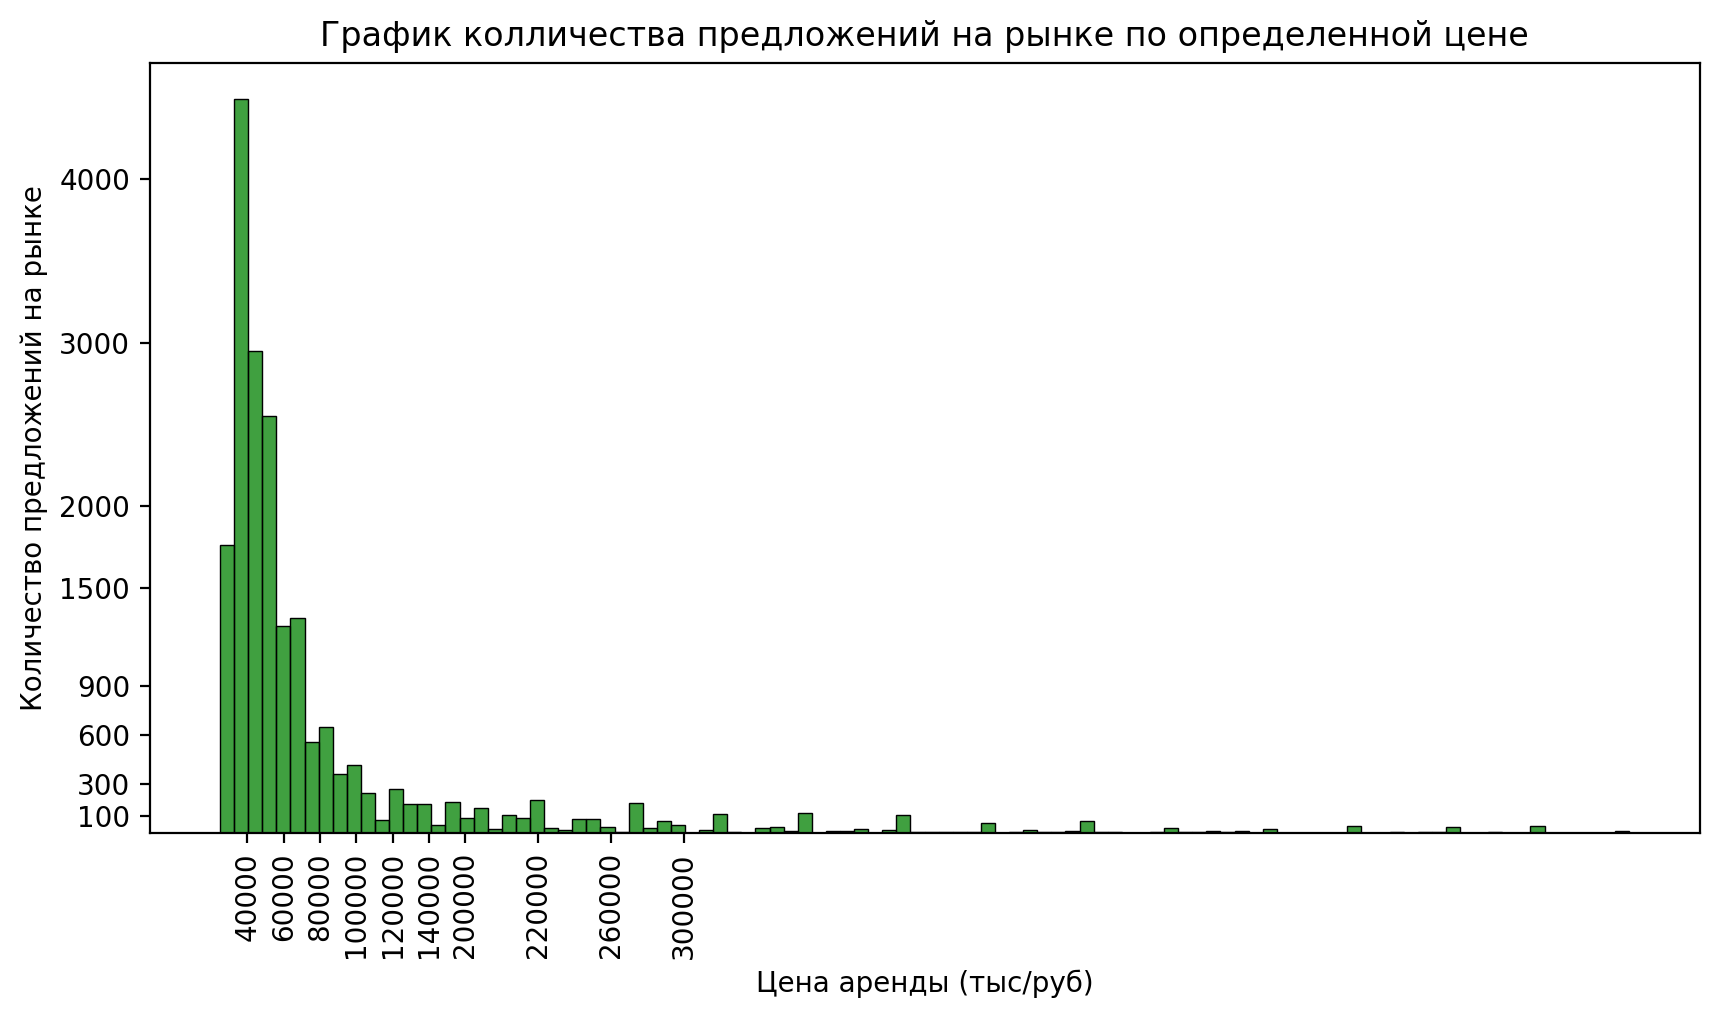

In [215]:
%config InlineBackend.figure_format='retina'
coast['Price']
plt.figure(figsize=(10,5))
sns.histplot(x='Price', data=coast, bins=100, color='green')
new_xticks = [40_000,60_000, 80_000, 100_000, 120_000, 140_000, 160_000, 200_000, 240_000, 280_000]
new_xticklabels = [40000, 60_000, 80_000, 100_000, 120_000, 140_000, 200_000, 220_000, 260_000, 300_000] 
plt.xticks(new_xticks, new_xticklabels)
plt.xticks(rotation=90)  
new_yticks = [100,300,600,900,1_500, 2_000, 3_000, 4_000]
plt.yticks(new_yticks)
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Количество предложений на рынке' )
plt.title('График колличества предложений на рынке по определенной цене')

Этот график отображает взаимосвязь цены квартиры с ее площадью и количеством комнат:
- чем больше площадь тем чаще всего дороже квартира
- количество комнат так же влияет на цену квартиры 
(на графике колличество комнат отображено ввиде кружочков разного цвета и разного размера, чем больше размер тем больше комнат)
- Мы видим, что большая часть квартир площадью до 200м2

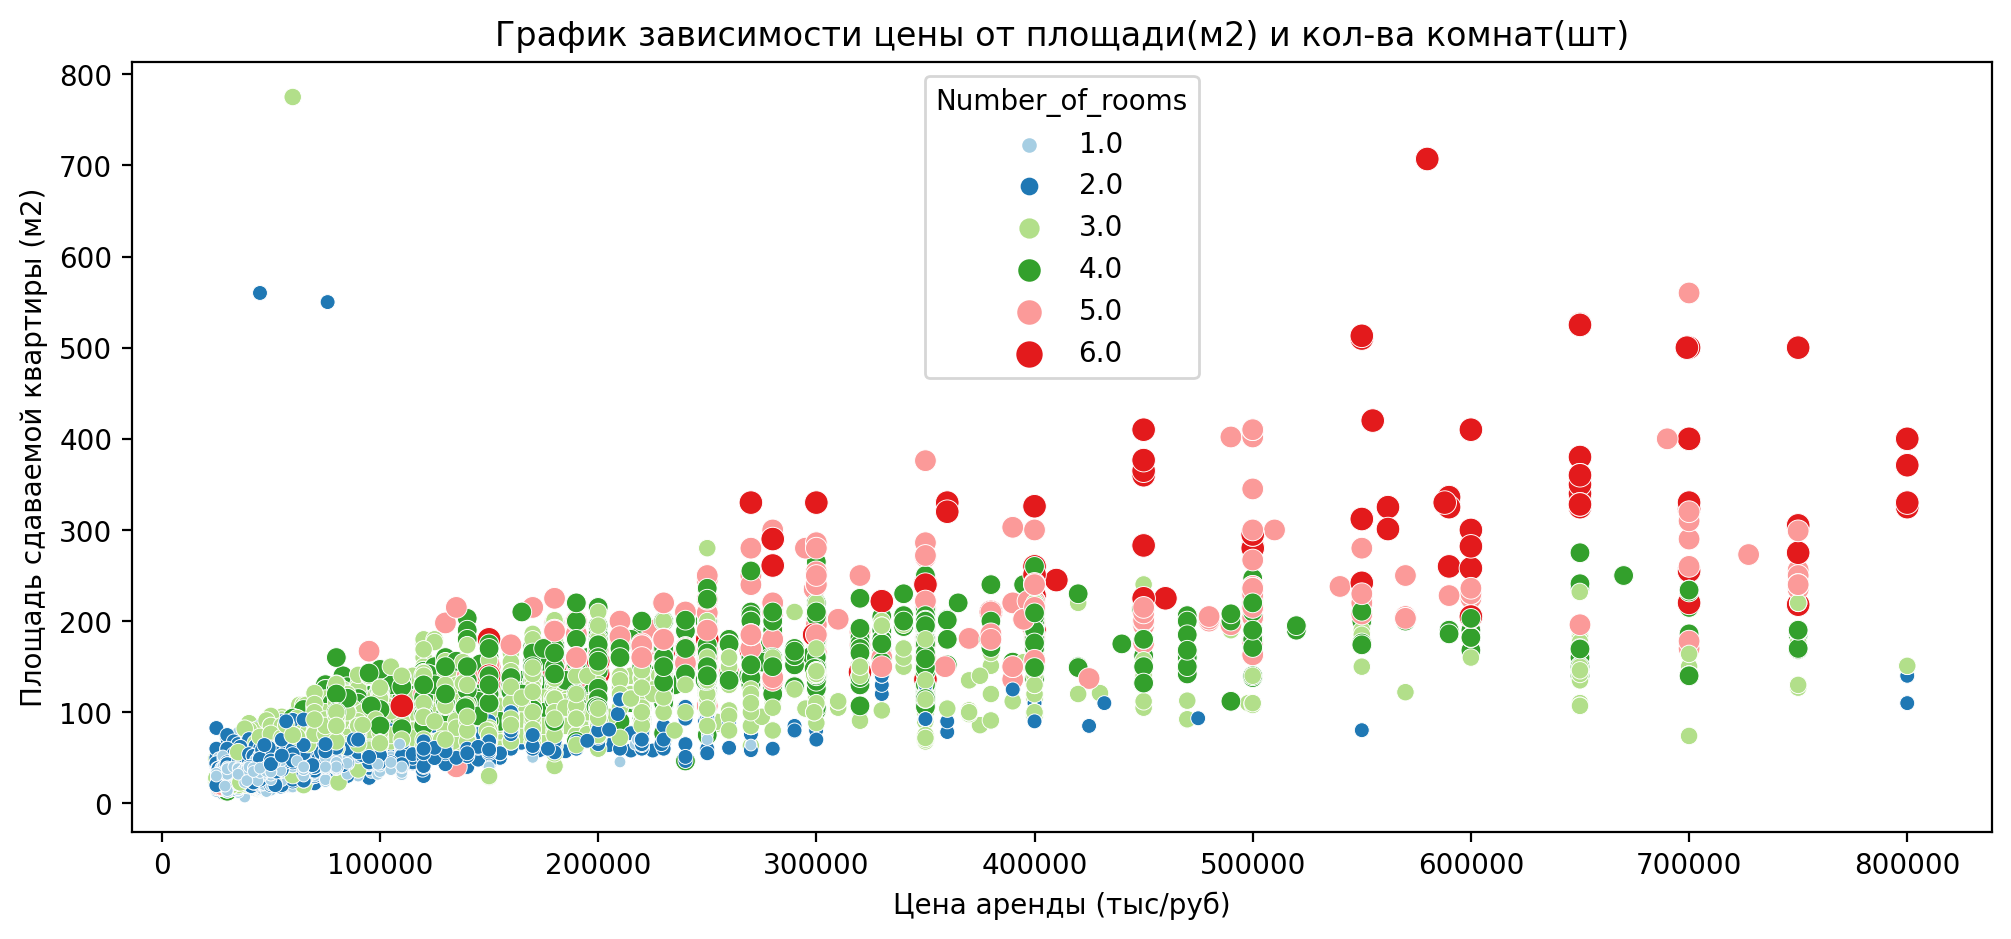

In [216]:
# Этот код группирует строки в датафрейме rlst по значениям столбцов 'Цена' и 'Общая площадь'
# Новый датафрейм new_rlst будет содержать уникальные комбинации значений этих двух столбцов
# as_index=False указывает, что новый датафрейм не должен использовать значения группировки в качестве индекса строк
# new_rlst = rlst.groupby(['Цена аренды', 'Общая площадь'], as_index=False)

new_rlst = coast[['Price', 'Total_area', 'Number_of_rooms']]
plt.figure(figsize=(12, 5))
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Площадь сдаваемой квартиры (м2)')
plt.title('График зависимости цены от площади(м2) и кол-ва комнат(шт)')
sns.scatterplot(data=coast, x='Price', y='Total_area',
                hue='Number_of_rooms',  palette='Paired', size='Number_of_rooms')
plt.show()

Text(0.5, 1.0, 'График взаимосвязи цены аренды и площади сдаваемого жилья ')

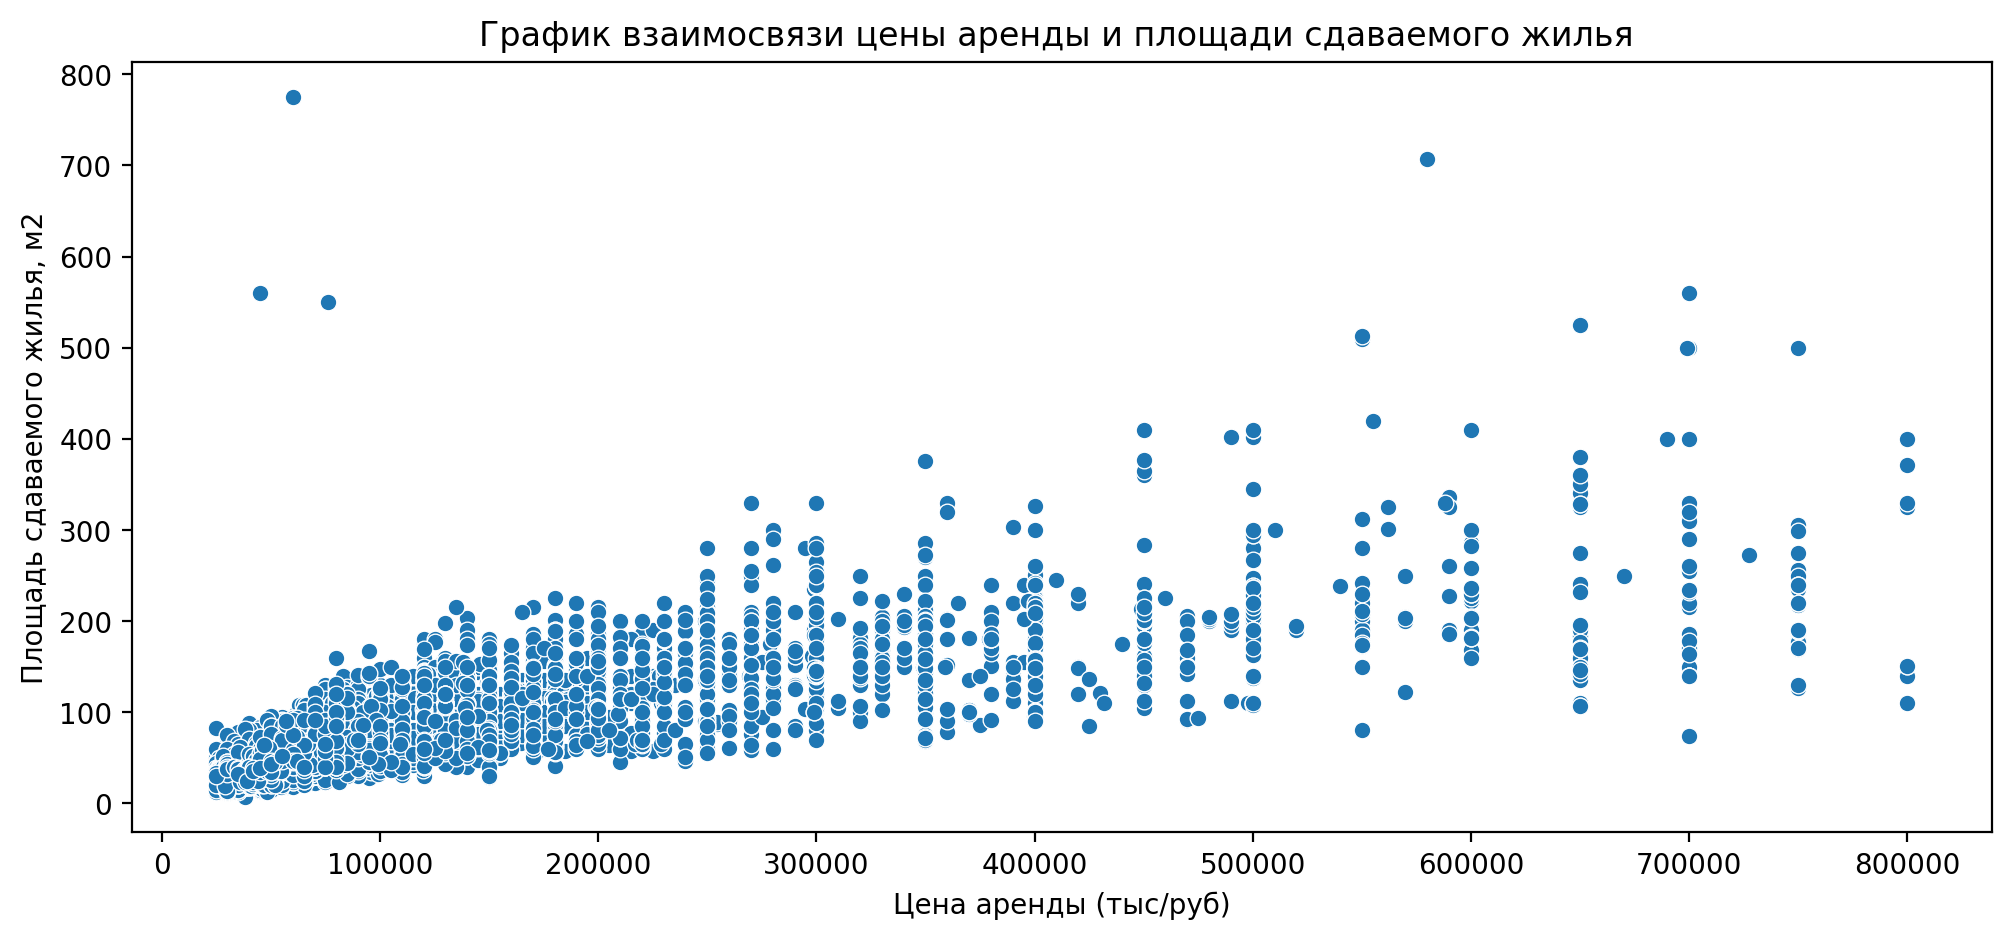

In [217]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=coast, x='Price', y='Total_area')
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Площадь сдаваемого жилья, м2')
plt.title('График взаимосвязи цены аренды и площади сдаваемого жилья ')

Text(0.5, 1.0, 'График взаимосвязи цены аренды и количества комнат')

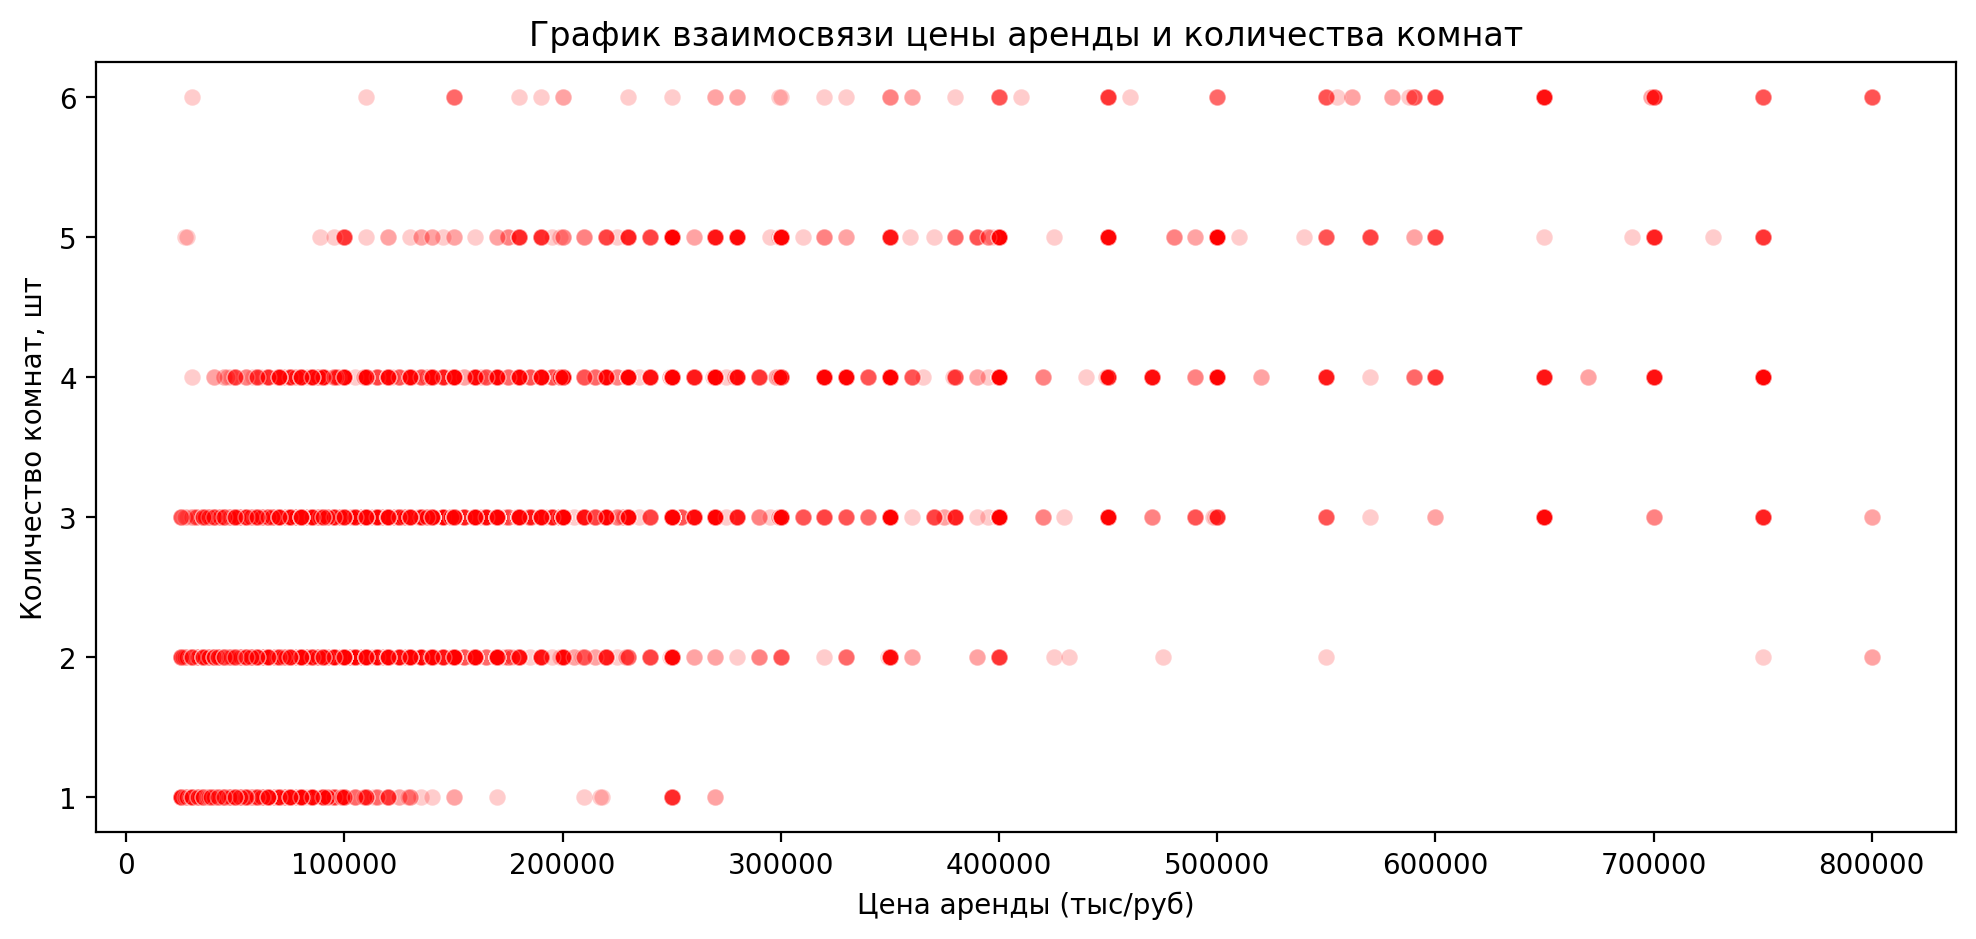

In [218]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=coast, x='Price', y='Number_of_rooms',
                color='red', alpha=0.2)
plt.xlabel('Цена аренды (тыс/руб)')
plt.ylabel('Количество комнат, шт')
plt.title('График взаимосвязи цены аренды и количества комнат')

/var/folders/rm/h4bqrsdj2d19w0fg0kjm23wm0000gn/T/ipykernel_16314/3935888326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rlst.drop('Rental_price',inplace=True,axis=1)


<Axes: >

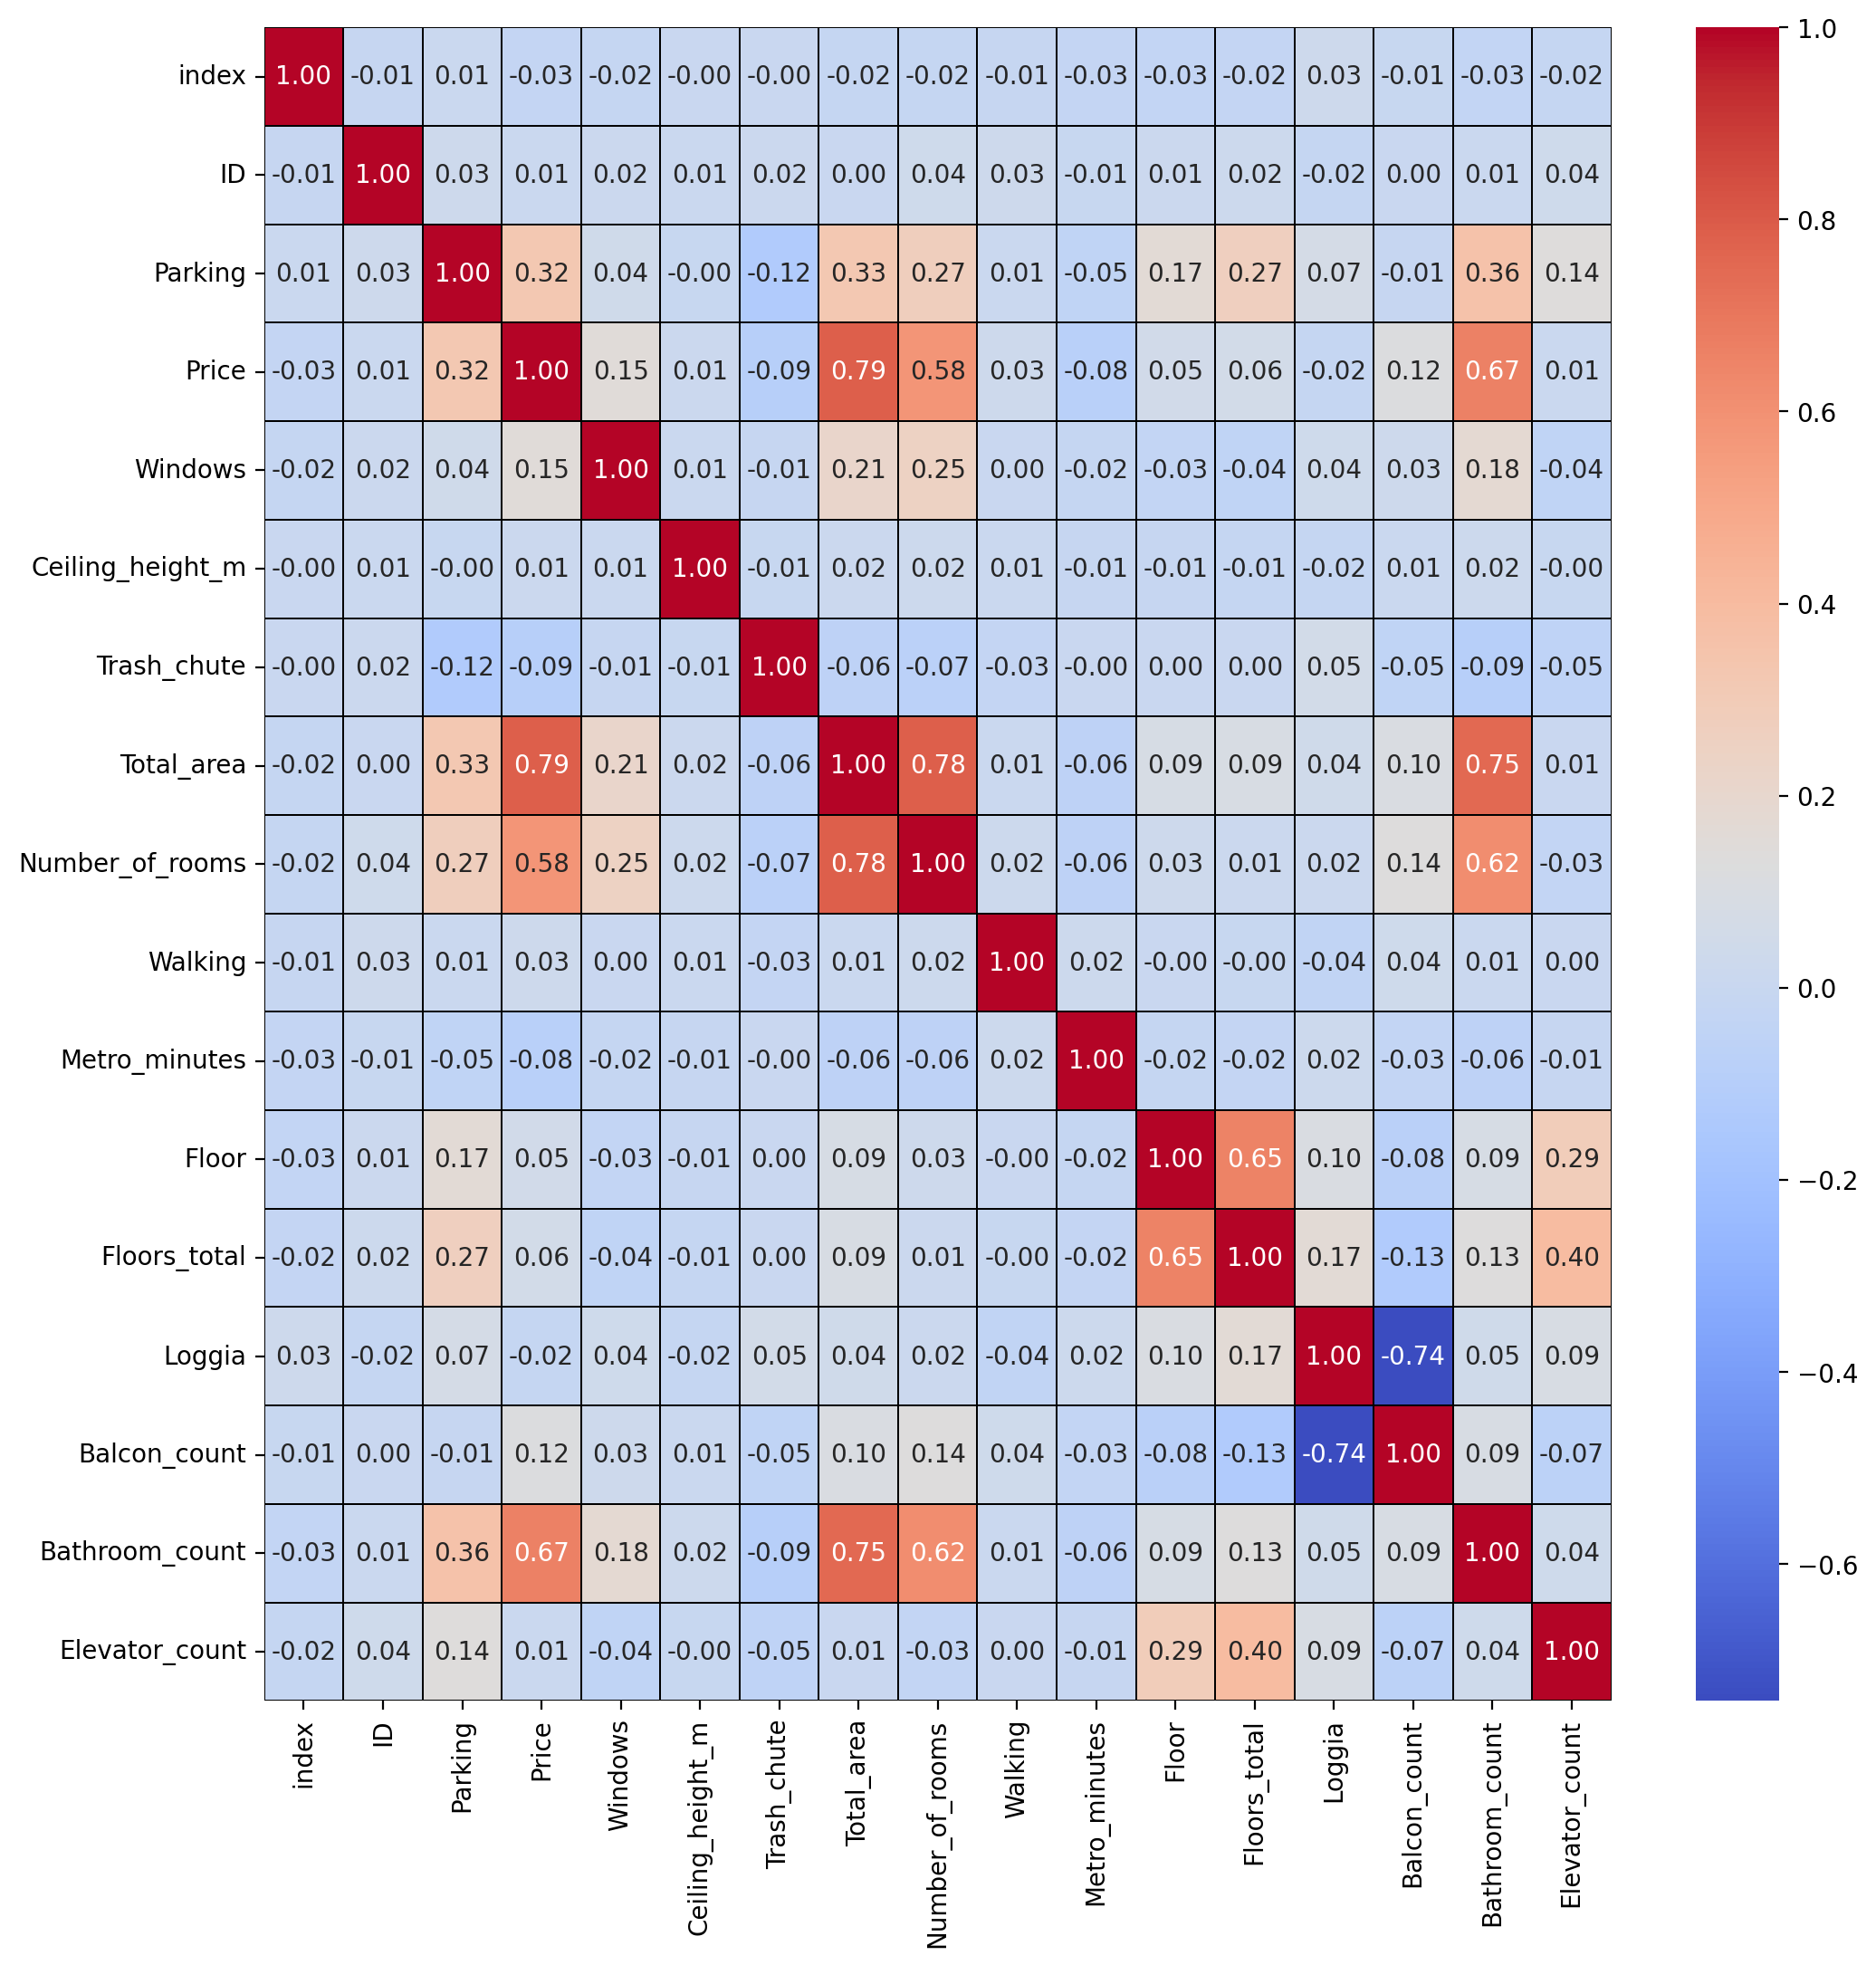

In [223]:
rlst.drop('Rental_price', inplace=True, axis=1)
plt.figure(figsize=(12, 12))
sns.heatmap(rlst.corr(), annot=True, cmap='coolwarm',
            linewidths=0.1, linecolor='black', fmt='.2f')

In [226]:
# rlst.to_csv('data.csv')

index               0
ID                  0
Parking             0
Price               0
Windows             0
Ceiling_height_m    0
Trash_chute         0
Total_area          0
Number_of_rooms     0
Walking             0
Metro_minutes       0
Floor               0
Floors_total        0
Loggia              0
Balcon_count        0
Bathroom_count      0
Elevator_count      0
dtype: int64